# Dark Energy $c_s^2$ data analysis
Author: João Victor Rebouças, May 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = "stix"
mpl.rcParams['font.family'] = "STIXGeneral"


In [6]:
# Load chains
indices = range(3, 6+1)
settings = {
    "ignore_rows": 0.4,
}
chains = {}
for i in indices:
    chain = getdist.loadMCSamples(f"../chains/MCMC{i}/MCMC{i}", settings=settings)
    try:
        chain.paramNames.parWithName("log10_cs2_0").label = r"\log_{10}(c_{s,0}^2)"
    except Exception:
        pass
    chains[i] = chain

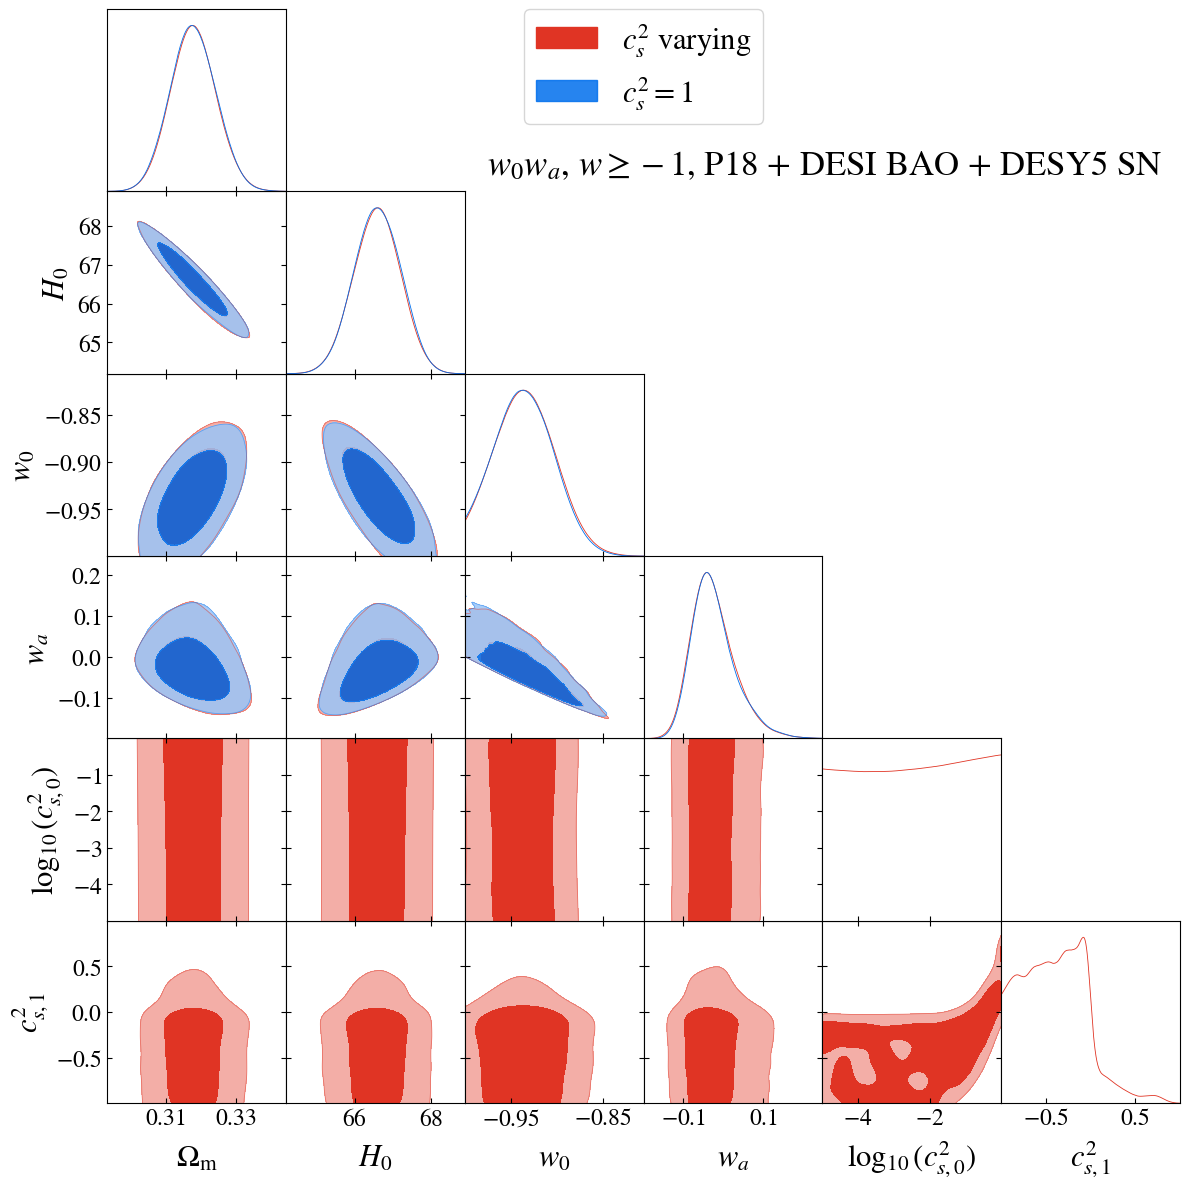

In [29]:
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=20
p.settings.axes_labelsize=25
p.settings.legend_fontsize=25
p.triangle_plot(
    [chains[3], chains[5]],
    ["omegam", "H0", "w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=True,
    legend_labels=[
        r"$c_s^2$ varying",
        r"$c_s^2 = 1$",
    ]
)
p.fig.text(0.41, 0.85, r"$w_0w_a$, $w \geq -1$, P18 + DESI BAO + DESY5 SN", fontsize=25)
p.export("plots/w0wacs2_quint_pbs.pdf")

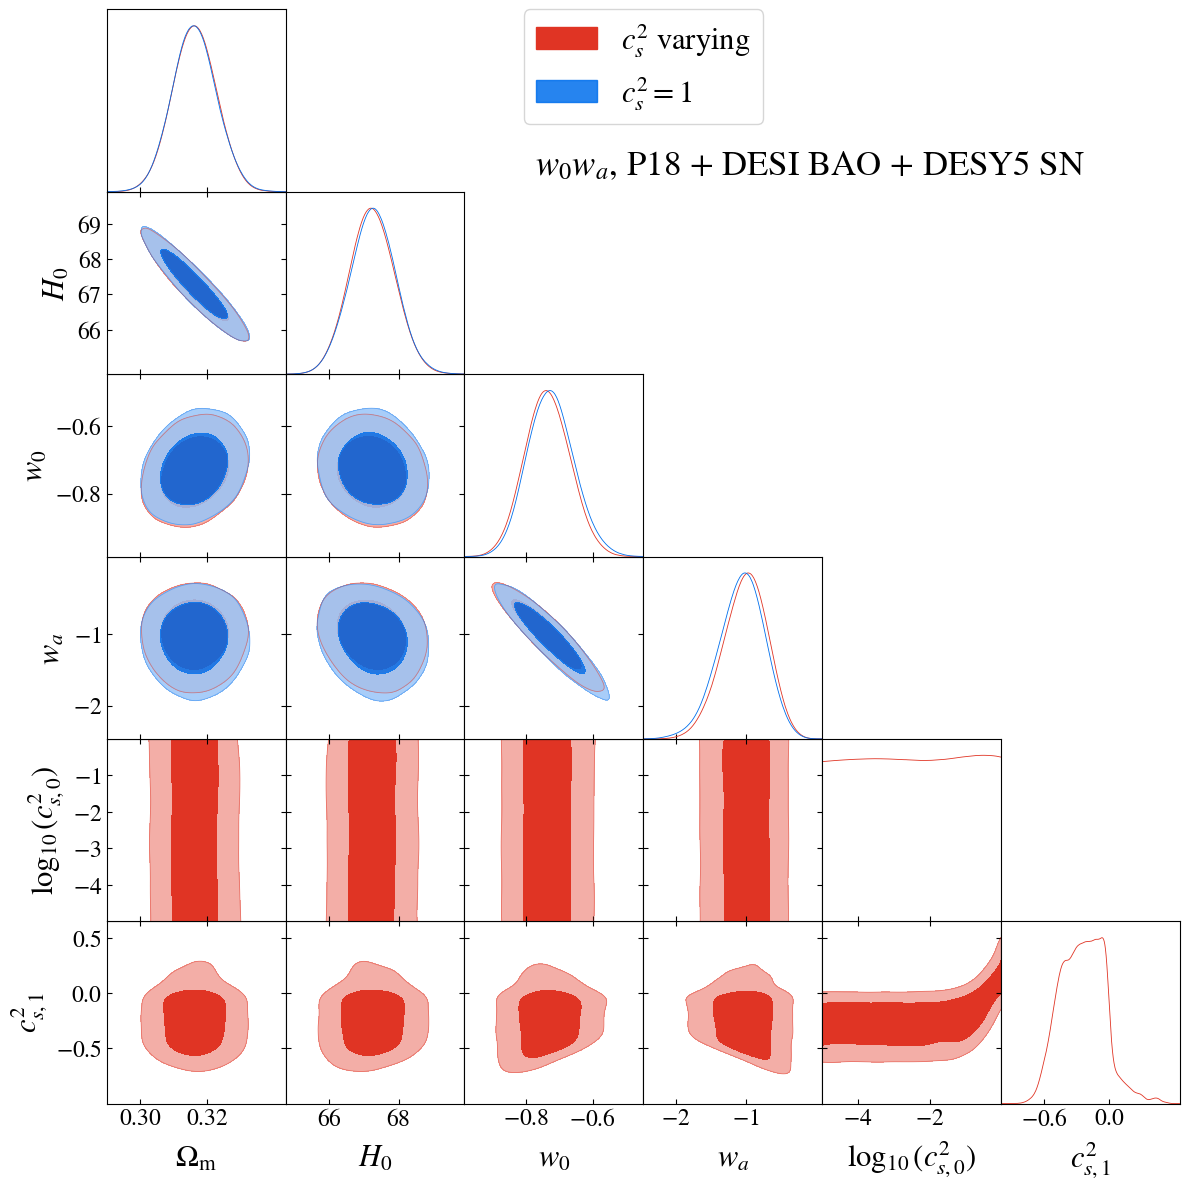

In [27]:
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=20
p.settings.axes_labelsize=25
p.settings.legend_fontsize=25
p.triangle_plot(
    [chains[4], chains[6]],
    ["omegam", "H0", "w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=True,
    legend_labels=[
        r"$c_s^2$ varying",
        r"$c_s^2 = 1$",
    ]
)
p.fig.text(0.45, 0.85, r"$w_0w_a$, P18 + DESI BAO + DESY5 SN", fontsize=25)
p.export("plots/w0wacs2_pbs.pdf")

In [31]:
for limit in [1, 2]:
    print(chains[4].getInlineLatex("cs2_1", limit=limit))

c_{s,1}^2 = -0.24^{+0.22}_{-0.19}
c_{s,1}^2 = -0.24^{+0.37}_{-0.41}
